# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

**Sumber Dataset**:  
Dataset yang digunakan pada eksperimen ini adalah **Loan Prediction Dataset** yang diperoleh dari platform Kaggle.
Dataset ini berisi data calon peminjam dengan berbagai atribut demografis dan finansial, seperti jenis kelamin, status pernikahan, tingkat pendidikan, pendapatan pemohon, jumlah pinjaman, dan riwayat kredit.

Tujuan dari penggunaan dataset ini adalah untuk membangun model machine learning yang mampu **memprediksi status persetujuan pinjaman (Loan Status)** berdasarkan karakteristik pemohon.
Masalah ini termasuk ke dalam **klasifikasi biner**, di mana output model berupa dua kelas, yaitu pinjaman disetujui atau tidak disetujui.

Dataset ini dipilih karena memiliki struktur data tabular yang jelas, kombinasi fitur numerik dan kategorikal, serta cocok untuk diterapkan dalam sistem machine learning end-to-end.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Pengaturan visualisasi
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"irvannurdiansyah","key":"395df5896683452c3c7ab12f4b4eb6e0"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!pip install kaggle

In [5]:
!kaggle datasets download -d msfasha/loan-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/msfasha/loan-prediction-dataset
License(s): MIT
  0% 0.00/9.01k [00:00<?, ?B/s]
100% 9.01k/9.01k [00:00<00:00, 28.6MB/s]


In [6]:
!unzip loan-prediction-dataset.zip

Archive:  loan-prediction-dataset.zip
  inflating: loan_prediction_dataset.csv  


In [7]:
#Type your code here
# Memuat dataset
df = pd.read_csv("loan_prediction_dataset.csv")

# Menampilkan 5 baris pertama
df.head()

,age,income,credit_score,dependents,home_owner,loan_approved
0,54,100000.00,334,0,1,1
1,67,85233.42,593,2,1,1
2,29,16737.15,502,0,0,1
3,42,69332.50,367,3,0,0
4,58,28211.14,430,0,1,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [8]:
#Type your code here
# Ukuran dataset
df.shape

(1000, 6)

In [9]:
# Melihat tipe data setiap kolom
df.dtypes

,0
age,int64
income,float64
credit_score,int64
dependents,int64
home_owner,int64
loan_approved,int64


In [10]:
# Analisis Target Variable
df['loan_approved'].value_counts()

,count
loan_approved,
1,782
0,218


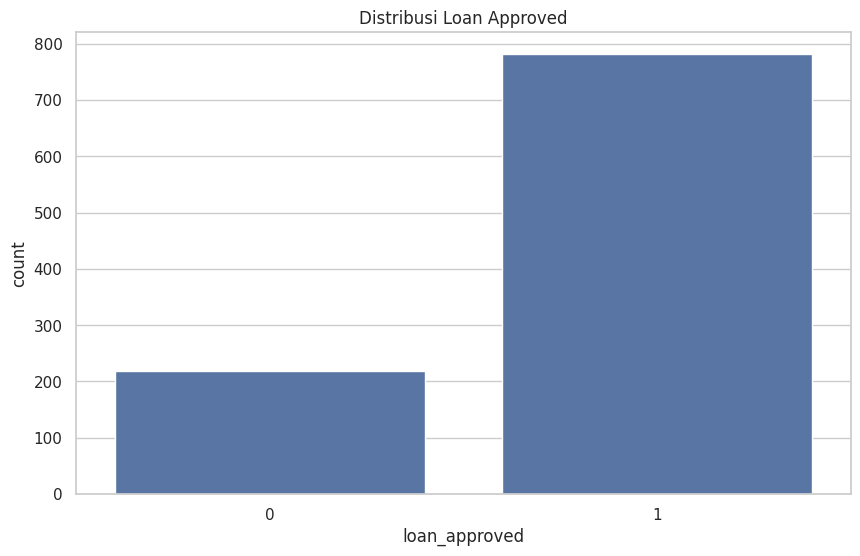

In [11]:
sns.countplot(x='loan_approved', data=df)
plt.title("Distribusi Loan Approved")
plt.show()

In [12]:
# Cek missing values
df.isnull().sum()

,0
age,0
income,0
credit_score,0
dependents,0
home_owner,0
loan_approved,0


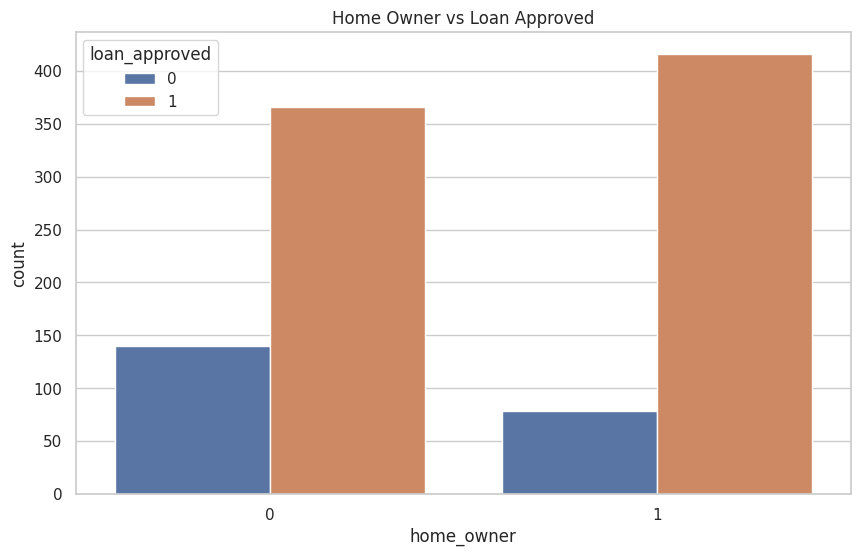

In [13]:
# Analisis Fitur Kategorikal
sns.countplot(x='home_owner', hue='loan_approved', data=df)
plt.title("Home Owner vs Loan Approved")
plt.show()

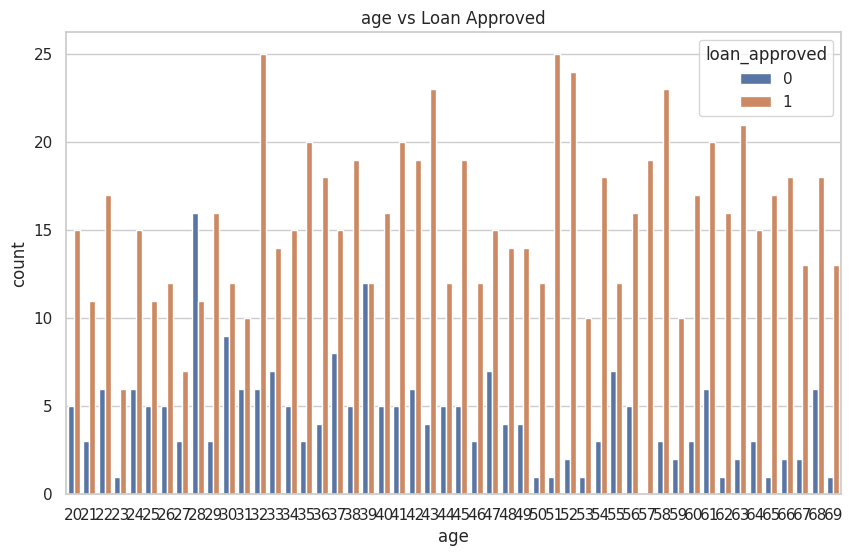

In [14]:
sns.countplot(x='age', hue='loan_approved', data=df)
plt.title("age vs Loan Approved")
plt.show()

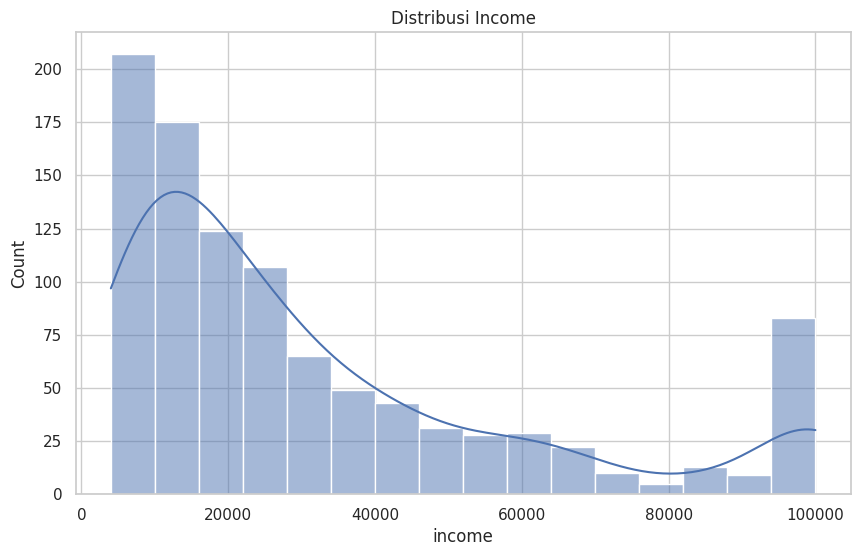

In [15]:
# Analisis Fitur Numerik
sns.histplot(df['income'], kde=True)
plt.title("Distribusi Income")
plt.show()

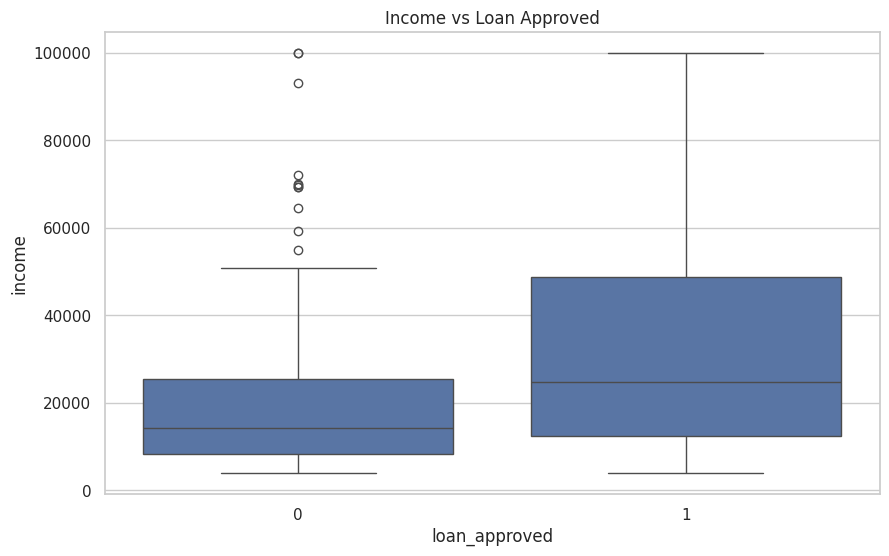

In [16]:
sns.boxplot(x='loan_approved', y='income', data=df)
plt.title("Income vs Loan Approved")
plt.show()

Berdasarkan hasil EDA, dataset memiliki fitur numerik seperti age, income, credit_score,
dan dependents, serta satu fitur kategorikal yaitu home_owner.
Target variabel loan_approved menunjukkan distribusi yang relatif seimbang.
Fitur income dan credit_score terlihat memiliki pengaruh terhadap status persetujuan pinjaman,
sehingga perlu dipertahankan pada tahap pemodelan.


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

Keputusan Teknis

Missing value
- Numerik → median (robust)
- Kategorikal → mode

Encoding
- home_owner → Label Encoding (binary)

Scaling
- StandardScaler (karena income & credit_score skala besar)

Target
- Dipisahkan dari fitur

In [17]:
# Pisahkan Fitur & Target
X = df.drop(columns=['loan_approved'])
y = df['loan_approved']

In [18]:
# Identifikasi Tipe Fitur
numerical_features = ['age', 'income', 'credit_score', 'dependents']
categorical_features = ['home_owner']

## Menangani Missing Values

In [19]:
# Numerik → Median
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
X[numerical_features] = num_imputer.fit_transform(X[numerical_features])

In [20]:
# Kategorikal → Mode
cat_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_features] = cat_imputer.fit_transform(X[categorical_features])

In [21]:
## Encoding Fitur Kategorikal
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['home_owner'] = le.fit_transform(X['home_owner'])

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

## Validasi Hasil Preprocessing

In [23]:
X.head()

,age,income,credit_score,dependents,home_owner
0,0.678021,2.426761,-1.463929,-1.426097,1
1,1.610156,1.900215,0.118241,-0.018996,1
2,-1.114547,-0.542217,-0.437656,-1.426097,0
3,-0.182412,1.333222,-1.262340,0.684554,0
4,0.964832,-0.133079,-0.877488,-1.426097,1


- income jauh di atas rata-rata

- credit_score di bawah rata-rata

- dependents rendah dibanding populasi

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1000 non-null   float64
 1   income        1000 non-null   float64
 2   credit_score  1000 non-null   float64
 3   dependents    1000 non-null   float64
 4   home_owner    1000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


Tahapan preprocessing dilakukan berdasarkan hasil EDA.
Missing value pada fitur numerik ditangani menggunakan nilai median,
sedangkan fitur kategorikal ditangani menggunakan nilai modus.
Fitur kategorikal home_owner diencoding secara label encoding,
dan seluruh fitur numerik dilakukan standarisasi agar berada pada skala yang sama.


In [25]:
# Menggabungkan kembali fitur dan target
df_preprocessed = X.copy()
df_preprocessed['loan_approved'] = y.values

## Validasi dataset hasil setelah digaugkan kembali



In [26]:
df_preprocessed.head()

,age,income,credit_score,dependents,home_owner,loan_approved
0,0.678021,2.426761,-1.463929,-1.426097,1,1
1,1.610156,1.900215,0.118241,-0.018996,1,1
2,-1.114547,-0.542217,-0.437656,-1.426097,0,1
3,-0.182412,1.333222,-1.262340,0.684554,0,0
4,0.964832,-0.133079,-0.877488,-1.426097,1,1


In [27]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1000 non-null   float64
 1   income         1000 non-null   float64
 2   credit_score   1000 non-null   float64
 3   dependents     1000 non-null   float64
 4   home_owner     1000 non-null   int64  
 5   loan_approved  1000 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 47.0 KB


In [28]:
# Simpan Dataset Hasil Preprocessing
df_preprocessed.to_csv("loan_prediction_preprocessed.csv", index=False)